In [26]:
import qsharp

In [27]:
%%qsharp

    open Microsoft.Quantum.Canon;
    open Microsoft.Quantum.Intrinsic;
    open Microsoft.Quantum.Measurement;
    open Microsoft.Quantum.Arrays;
    open Microsoft.Quantum.Convert;
    open Microsoft.Quantum.Diagnostics;
    open Microsoft.Quantum.Math;
    
    ///Credit for all intermediate algorithms: 
    /// "https://tsmatz.wordpress.com/2019/03/12/quantum-computing-grover-algorithm-programming/"
    
    operation ApplySearch (iterations : Int, numberOfDatabaseQubits : Int) : (Result, Result[]) {
        
        use resultQubit = Qubit();
        
        use databaseQubitRegister = Qubit[numberOfDatabaseQubits];
        
        DumpMachine();
        
        QuantumSearch( iterations, resultQubit, databaseQubitRegister);
        
        DumpMachine();
        
        let finalResult = M(resultQubit);
        
        let finalElements = MultiM(databaseQubitRegister);
        
        DumpMachine();
        
        Reset(resultQubit);
        
        for resultIndex in 0 .. numberOfDatabaseQubits - 1 {
            Reset(databaseQubitRegister[resultIndex]);
        }
        
        if finalResult == One{
            Message($"Search Success!");
            Message($"Found Database Index : {finalElements}");
        }
        
        else {
            Message($"Search Failure");
        }
        
        return(finalResult, finalElements);
    }
    
    operation QuantumSearch (iterations : Int, resultQubit : Qubit, databaseQubitRegister : Qubit[]) : Unit { 
        
        PrepareState(resultQubit, databaseQubitRegister);
        
        for index in 0 .. iterations - 1{
            ReflectResult(resultQubit);
            
            ReflectAll(resultQubit, databaseQubitRegister);
        }
    }
        
    operation PrepareState (resultQubit : Qubit, databaseQubitRegister : Qubit[]) : Unit is Adj + Ctl { 
        
        ApplySuperpositionOracle(databaseQubitRegister);
        
        ApplyCXOracle(resultQubit, databaseQubitRegister);

    }
        
    operation ApplySuperpositionOracle (databaseQubitRegister : Qubit[]) : Unit is Adj + Ctl {
        
        let numberOfQubits = Length(databaseQubitRegister);
        
        for qubitIndex in 0 .. numberOfQubits - 1{
            H(databaseQubitRegister[qubitIndex]);
        } 
    }
        
    operation ApplyCXOracle (resultQubit : Qubit, databaseQubitRegister : Qubit[]) : Unit is Adj + Ctl { 
        
        Controlled X (databaseQubitRegister, resultQubit);
    }
    
    operation ReflectZero (qubits : Qubit[]) : Unit {
        
        let numberOfZeroQubits = Length(qubits);
        
        for index in 0 .. numberOfZeroQubits - 1{
            X(qubits[index]);
        }
        
        Controlled Z(qubits[1 .. numberOfZeroQubits - 1], qubits[0]);
        
        for secondIndex in 0 .. numberOfZeroQubits - 1{
            X(qubits[secondIndex]);
        }
    }
    
    operation ReflectResult (resultQubit : Qubit) : Unit {
        
        R1(PI(), resultQubit);
    }
    
    operation ReflectAll (resultQubit : Qubit, databaseQubitRegister : Qubit[]) : Unit {
        
        Adjoint PrepareState (resultQubit, databaseQubitRegister);
        
        ReflectZero([resultQubit] + databaseQubitRegister);
        
        PrepareState(resultQubit, databaseQubitRegister);
    }
        
    operation Main() : Unit {
        
        let numberOfDatabaseQubits = 6;
        let iterations = 3;
        
        let result = ApplySearch(iterations, numberOfDatabaseQubits);
    }
        
    

In [28]:
Main.simulate()

|0⟩	1 + 0𝑖
|1⟩	0 + 0𝑖
|10⟩	0 + 0𝑖
|100⟩	0 + 0𝑖
|2⟩	0 + 0𝑖
|20⟩	0 + 0𝑖
|3⟩	0 + 0𝑖
|11⟩	0 + 0𝑖
|30⟩	0 + 0𝑖
|110⟩	0 + 0𝑖
|4⟩	0 + 0𝑖
|21⟩	0 + 0𝑖
|40⟩	0 + 0𝑖
|5⟩	0 + 0𝑖
|12⟩	0 + 0𝑖
|31⟩	0 + 0𝑖
|50⟩	0 + 0𝑖
|101⟩	0 + 0𝑖
|120⟩	0 + 0𝑖
|6⟩	0 + 0𝑖
|22⟩	0 + 0𝑖
|41⟩	0 + 0𝑖
|60⟩	0 + 0𝑖
|7⟩	0 + 0𝑖
|13⟩	0 + 0𝑖
|32⟩	0 + 0𝑖
|51⟩	0 + 0𝑖
|70⟩	0 + 0𝑖
|111⟩	0 + 0𝑖
|8⟩	0 + 0𝑖
|23⟩	0 + 0𝑖
|42⟩	0 + 0𝑖
|61⟩	0 + 0𝑖
|80⟩	0 + 0𝑖
|9⟩	0 + 0𝑖
|14⟩	0 + 0𝑖
|33⟩	0 + 0𝑖
|52⟩	0 + 0𝑖
|71⟩	0 + 0𝑖
|90⟩	0 + 0𝑖
|102⟩	0 + 0𝑖
|121⟩	0 + 0𝑖
|24⟩	0 + 0𝑖
|43⟩	0 + 0𝑖
|62⟩	0 + 0𝑖
|81⟩	0 + 0𝑖
|15⟩	0 + 0𝑖
|34⟩	0 + 0𝑖
|53⟩	0 + 0𝑖
|72⟩	0 + 0𝑖
|91⟩	0 + 0𝑖
|112⟩	0 + 0𝑖
|25⟩	0 + 0𝑖
|44⟩	0 + 0𝑖
|63⟩	0 + 0𝑖
|82⟩	0 + 0𝑖
|16⟩	0 + 0𝑖
|35⟩	0 + 0𝑖
|54⟩	0 + 0𝑖
|73⟩	0 + 0𝑖
|92⟩	0 + 0𝑖
|103⟩	0 + 0𝑖
|122⟩	0 + 0𝑖
|26⟩	0 + 0𝑖
|45⟩	0 + 0𝑖
|64⟩	0 + 0𝑖
|83⟩	0 + 0𝑖
|17⟩	0 + 0𝑖
|36⟩	0 + 0𝑖
|55⟩	0 + 0𝑖
|74⟩	0 + 0𝑖
|93⟩	0 + 0𝑖
|113⟩	0 + 0𝑖
|27⟩	0 + 0𝑖
|46⟩	0 + 0𝑖
|65⟩	0 + 0𝑖
|84⟩	0 + 0𝑖
|18⟩	0 + 0𝑖
|37⟩	0 + 0𝑖
|56⟩	0 + 0𝑖
|75⟩	0 + 0𝑖
|94⟩	0 + 0𝑖
|104⟩	0 + 0𝑖
|123⟩	0 + 0𝑖
|28⟩	0 + 0𝑖
|47⟩	0 + 0𝑖
|66⟩	0 + 0𝑖
|85⟩	0 + 0𝑖
|19⟩	0 + 0𝑖
|38⟩	0 + 0𝑖
|57⟩	0 + 0𝑖
|76⟩	0 + 0𝑖
|95⟩	0 + 0𝑖
|114⟩	0 + 0𝑖
|29⟩	0 + 0𝑖
|48⟩	0 + 0𝑖
|67⟩	0 + 0𝑖
|86⟩	0 + 0𝑖
|39⟩	0 + 0𝑖
|58⟩	0 + 0𝑖
|77⟩	0 + 0𝑖
|96⟩	0 + 0𝑖
|105⟩	0 + 0𝑖
|124⟩	0 + 0𝑖
|49⟩	0 + 0𝑖
|68⟩	0 + 0𝑖
|87⟩	0 + 0𝑖
|59⟩	0 + 0𝑖
|78⟩	0 + 0𝑖
|97⟩	0 + 0𝑖
|115⟩	0 + 0𝑖
|69⟩	0 + 0𝑖
|88⟩	0 + 0𝑖
|79⟩	0 + 0𝑖
|98⟩	0 + 0𝑖
|106⟩	0 + 0𝑖
|125⟩	0 + 0𝑖
|89⟩	0 + 0𝑖
|99⟩	0 + 0𝑖
|116⟩	0 + 0𝑖
|107⟩	0 + 0𝑖
|126⟩	0 + 0𝑖
|117⟩	0 + 0𝑖
|108⟩	0 + 0𝑖
|127⟩	0 + 0𝑖
|118⟩	0 + 0𝑖
|109⟩	0 + 0𝑖
|119⟩	0 + 0𝑖

|0⟩	-0.08053588867187533 + -6.2843127220650734E-18𝑖
|1⟩	0 + 0𝑖
|10⟩	-0.08053588867187537 + -6.2843127220650734E-18𝑖
|100⟩	-0.08053588867187536 + -6.284312722065073E-18𝑖
|2⟩	-0.08053588867187536 + -6.2843127220650734E-18𝑖
|20⟩	-0.08053588867187535 + -6.284312722065073E-18𝑖
|3⟩	0 + 0𝑖
|11⟩	0 + 0𝑖
|30⟩	-0.08053588867187537 + -6.284312722065072E-18𝑖
|110⟩	-0.08053588867187537 + -6.2843127220650734E-18𝑖
|4⟩	-0.08053588867187533 + -6.284312722065073E-18𝑖
|21⟩	0 + 0𝑖
|40⟩	-0.08053588867187535 + -6.2843127220650734E-18𝑖
|5⟩	0 + 0𝑖
|12⟩	-0.08053588867187536 + -6.284312722065073E-18𝑖
|31⟩	0 + 0𝑖
|50⟩	-0.08053588867187536 + -6.284312722065073E-18𝑖
|101⟩	0 + 0𝑖
|120⟩	-0.08053588867187535 + -6.2843127220650734E-18𝑖
|6⟩	-0.08053588867187537 + -6.2843127220650734E-18𝑖
|22⟩	-0.08053588867187539 + -6.2843127220650734E-18𝑖
|41⟩	0 + 0𝑖
|60⟩	-0.08053588867187537 + -6.284312722065073E-18𝑖
|7⟩	0 + 0𝑖
|13⟩	0 + 0𝑖
|32⟩	-0.08053588867187533 + -6.2843127220650734E-18𝑖
|51⟩	0 + 0𝑖
|70⟩	-0.08053588867187539 + -6.2843127220650734E-18𝑖
|111⟩	0 + 0𝑖
|8⟩	-0.08053588867187533 + -6.2843127220650734E-18𝑖
|23⟩	0 + 0𝑖
|42⟩	-0.08053588867187537 + -6.2843127220650734E-18𝑖
|61⟩	0 + 0𝑖
|80⟩	-0.08053588867187533 + -6.2843127220650734E-18𝑖
|9⟩	0 + 0𝑖
|14⟩	-0.08053588867187536 + -6.284312722065072E-18𝑖
|33⟩	0 + 0𝑖
|52⟩	-0.08053588867187536 + -6.284312722065073E-18𝑖
|71⟩	0 + 0𝑖
|90⟩	-0.08053588867187537 + -6.2843127220650734E-18𝑖
|102⟩	-0.08053588867187535 + -6.2843127220650734E-18𝑖
|121⟩	0 + 0𝑖
|24⟩	-0.08053588867187533 + -6.2843127220650734E-18𝑖
|43⟩	0 + 0𝑖
|62⟩	-0.08053588867187536 + -6.284312722065078E-18𝑖
|81⟩	0 + 0𝑖
|15⟩	0 + 0𝑖
|34⟩	-0.08053588867187537 + -6.2843127220650734E-18𝑖
|53⟩	0 + 0𝑖
|72⟩	-0.08053588867187535 + -6.2843127220650734E-18𝑖
|91⟩	0 + 0𝑖
|112⟩	-0.08053588867187533 + -6.2843127220650734E-18𝑖
|25⟩	0 + 0𝑖
|44⟩	-0.08053588867187535 + -6.284312722065073E-18𝑖
|63⟩	0 + 0𝑖
|82⟩	-0.08053588867187539 + -6.2843127220650734E-18𝑖
|16⟩	-0.08053588867187533 + -6.2843127220650734E-18𝑖
|35⟩	0 + 0𝑖
|54⟩	-0.08053588867187536 + -6.284312722065074E-18𝑖
|73⟩	0 + 0𝑖
|92⟩	-0.08053588867187535 + -6.284312722065073E-18𝑖
|103⟩	0 + 0𝑖
|122⟩	-0.08053588867187539 + -6.284312722065076E-18𝑖
|26⟩	-0.08053588867187536 + -6.2843127220650734E-18𝑖
|45⟩	0 + 0𝑖
|64⟩	-0.08053588867187535 + -6.2843127220650734E-18𝑖
|83⟩	0 + 0𝑖
|17⟩	0 + 0𝑖
|36⟩	-0.08053588867187536 + -6.284312722065073E-18𝑖
|55⟩	0 + 0𝑖
|74⟩	-0.08053588867187537 + -6.2843127220650734E-18𝑖
|93⟩	0 + 0𝑖
|113⟩	0 + 0𝑖
|27⟩	0 + 0𝑖
|46⟩	-0.0805358886718754 + -6.284312722065072E-18𝑖
|65⟩	0 + 0𝑖
|84⟩	-0.08053588867187536 + -6.284312722065073E-18𝑖
|18⟩	-0.08053588867187536 + -6.2843127220650734E-18𝑖
|37⟩	0 + 0𝑖
|56⟩	-0.08053588867187533 + -6.2843127220650734E-18𝑖
|75⟩	0 + 0𝑖
|94⟩	-0.08053588867187542 + -6.2843127220650734E-18𝑖
|104⟩	-0.08053588867187535 + -6.2843127220650734E-18𝑖
|123⟩	0 + 0𝑖
|28⟩	-0.08053588867187535 + -6.284312722065073E-18𝑖
|47⟩	0 + 0𝑖
|66⟩	-0.08053588867187537 + -6.2843127220650734E-18𝑖
|85⟩	0 + 0𝑖
|19⟩	0 + 0𝑖
|38⟩	-0.08053588867187535 + -6.2843127220650734E-18𝑖
|57⟩	0 + 0𝑖
|76⟩	-0.08053588867187536 + -6.284312722065073E-18𝑖
|95⟩	0 + 0𝑖
|114⟩	-0.08053588867187539 + -6.28431272206507E-18𝑖
|29⟩	0 + 0𝑖
|48⟩	-0.08053588867187533 + -6.2843127220650734E-18𝑖
|67⟩	0 + 0𝑖
|86⟩	-0.0805358886718754 + -6.2843127220650734E-18𝑖
|39⟩	0 + 0𝑖
|58⟩	-0.08053588867187536 + -6.284312722065074E-18𝑖
|77⟩	0 + 0𝑖
|96⟩	-0.08053588867187532 + -6.2843127220650734E-18𝑖
|105⟩	0 + 0𝑖
|124⟩	-0.08053588867187537 + -6.284312722065075E-18𝑖
|49⟩	0 + 0𝑖
|68⟩	-0.08053588867187536 + -6.284312722065073E-18𝑖
|87⟩	0 + 0𝑖
|59⟩	0 + 0𝑖
|78⟩	-0.08053588867187537 + -6.284312722065069E-18𝑖
|97⟩	0 + 0𝑖
|115⟩	0 + 0𝑖
|69⟩	0 + 0𝑖
|88⟩	-0.08053588867187533 + -6.2843127220650734E-18𝑖
|79⟩	0 + 0𝑖
|98⟩	-0.08053588867187537 + -6.2843127220650734E-18𝑖
|106⟩	-0.08053588867187537 + -6.2843127220650734E-18𝑖
|125⟩	0 + 0𝑖
|89⟩	0 + 0𝑖
|99⟩	0 + 0𝑖
|116⟩	-0.08053588867187535 + -6.284312722065073E-18𝑖
|107⟩	0 + 0𝑖
|126⟩	0 + 0𝑖
|117⟩	0 + 0𝑖
|108⟩	-0.08053588867187532 + -6.284312

|0⟩	0 + 0𝑖
|1⟩	0 + 0𝑖
|10⟩	0 + 0𝑖
|100⟩	0 + 0𝑖
|2⟩	0 + 0𝑖
|20⟩	0 + 0𝑖
|3⟩	0 + 0𝑖
|11⟩	0 + 0𝑖
|30⟩	0 + 0𝑖
|110⟩	0 + 0𝑖
|4⟩	0 + 0𝑖
|21⟩	0 + 0𝑖
|40⟩	0 + 0𝑖
|5⟩	0 + 0𝑖
|12⟩	0 + 0𝑖
|31⟩	0 + 0𝑖
|50⟩	0 + 0𝑖
|101⟩	0 + 0𝑖
|120⟩	0 + 0𝑖
|6⟩	0 + 0𝑖
|22⟩	0 + 0𝑖
|41⟩	0 + 0𝑖
|60⟩	0 + 0𝑖
|7⟩	0 + 0𝑖
|13⟩	0 + 0𝑖
|32⟩	0 + 0𝑖
|51⟩	0 + 0𝑖
|70⟩	0 + 0𝑖
|111⟩	0 + 0𝑖
|8⟩	0 + 0𝑖
|23⟩	0 + 0𝑖
|42⟩	0 + 0𝑖
|61⟩	0 + 0𝑖
|80⟩	0 + 0𝑖
|9⟩	0 + 0𝑖
|14⟩	0 + 0𝑖
|33⟩	0 + 0𝑖
|52⟩	0 + 0𝑖
|71⟩	0 + 0𝑖
|90⟩	0 + 0𝑖
|102⟩	0 + 0𝑖
|121⟩	0 + 0𝑖
|24⟩	-1 + -7.803120851710021E-17𝑖
|43⟩	0 + 0𝑖
|62⟩	0 + 0𝑖
|81⟩	0 + 0𝑖
|15⟩	0 + 0𝑖
|34⟩	0 + 0𝑖
|53⟩	0 + 0𝑖
|72⟩	0 + 0𝑖
|91⟩	0 + 0𝑖
|112⟩	0 + 0𝑖
|25⟩	0 + 0𝑖
|44⟩	0 + 0𝑖
|63⟩	0 + 0𝑖
|82⟩	0 + 0𝑖
|16⟩	0 + 0𝑖
|35⟩	0 + 0𝑖
|54⟩	0 + 0𝑖
|73⟩	0 + 0𝑖
|92⟩	0 + 0𝑖
|103⟩	0 + 0𝑖
|122⟩	0 + 0𝑖
|26⟩	0 + 0𝑖
|45⟩	0 + 0𝑖
|64⟩	0 + 0𝑖
|83⟩	0 + 0𝑖
|17⟩	0 + 0𝑖
|36⟩	0 + 0𝑖
|55⟩	0 + 0𝑖
|74⟩	0 + 0𝑖
|93⟩	0 + 0𝑖
|113⟩	0 + 0𝑖
|27⟩	0 + 0𝑖
|46⟩	0 + 0𝑖
|65⟩	0 + 0𝑖
|84⟩	0 + 0𝑖
|18⟩	0 + 0𝑖
|37⟩	0 + 0𝑖
|56⟩	0 + 0𝑖
|75⟩	0 + 0𝑖
|94⟩	0 + 0𝑖
|104⟩	0 + 0𝑖
|123⟩	0 + 0𝑖
|28⟩	0 + 0𝑖
|47⟩	0 + 0𝑖
|66⟩	0 + 0𝑖
|85⟩	0 + 0𝑖
|19⟩	0 + 0𝑖
|38⟩	0 + 0𝑖
|57⟩	0 + 0𝑖
|76⟩	0 + 0𝑖
|95⟩	0 + 0𝑖
|114⟩	0 + 0𝑖
|29⟩	0 + 0𝑖
|48⟩	0 + 0𝑖
|67⟩	0 + 0𝑖
|86⟩	0 + 0𝑖
|39⟩	0 + 0𝑖
|58⟩	0 + 0𝑖
|77⟩	0 + 0𝑖
|96⟩	0 + 0𝑖
|105⟩	0 + 0𝑖
|124⟩	0 + 0𝑖
|49⟩	0 + 0𝑖
|68⟩	0 + 0𝑖
|87⟩	0 + 0𝑖
|59⟩	0 + 0𝑖
|78⟩	0 + 0𝑖
|97⟩	0 + 0𝑖
|115⟩	0 + 0𝑖
|69⟩	0 + 0𝑖
|88⟩	0 + 0𝑖
|79⟩	0 + 0𝑖
|98⟩	0 + 0𝑖
|106⟩	0 + 0𝑖
|125⟩	0 + 0𝑖
|89⟩	0 + 0𝑖
|99⟩	0 + 0𝑖
|116⟩	0 + 0𝑖
|107⟩	0 + 0𝑖
|126⟩	0 + 0𝑖
|117⟩	0 + 0𝑖
|108⟩	0 + 0𝑖
|127⟩	0 + 0𝑖
|118⟩	0 + 0𝑖
|109⟩	0 + 0𝑖
|119⟩	0 + 0𝑖

Search Failure


()

In [29]:
with qsharp.capture_diagnostics() as diagnostics:
    Main.simulate()
print(diagnostics)

Search Success!
Found Database Index : [One,One,One,One,One,One]
[{'diagnostic_kind': 'state-vector', 'qubit_ids': [0, 1, 2, 3, 4, 5, 6], 'n_qubits': 7, 'amplitudes': {'0': {'Real': 1.0, 'Imaginary': 0.0, 'Magnitude': 1.0, 'Phase': 0.0}, '1': {'Real': 0.0, 'Imaginary': 0.0, 'Magnitude': 0.0, 'Phase': 0.0}, '2': {'Real': 0.0, 'Imaginary': 0.0, 'Magnitude': 0.0, 'Phase': 0.0}, '3': {'Real': 0.0, 'Imaginary': 0.0, 'Magnitude': 0.0, 'Phase': 0.0}, '4': {'Real': 0.0, 'Imaginary': 0.0, 'Magnitude': 0.0, 'Phase': 0.0}, '5': {'Real': 0.0, 'Imaginary': 0.0, 'Magnitude': 0.0, 'Phase': 0.0}, '6': {'Real': 0.0, 'Imaginary': 0.0, 'Magnitude': 0.0, 'Phase': 0.0}, '7': {'Real': 0.0, 'Imaginary': 0.0, 'Magnitude': 0.0, 'Phase': 0.0}, '8': {'Real': 0.0, 'Imaginary': 0.0, 'Magnitude': 0.0, 'Phase': 0.0}, '9': {'Real': 0.0, 'Imaginary': 0.0, 'Magnitude': 0.0, 'Phase': 0.0}, '10': {'Real': 0.0, 'Imaginary': 0.0, 'Magnitude': 0.0, 'Phase': 0.0}, '11': {'Real': 0.0, 'Imaginary': 0.0, 'Magnitude': 0.0, 'Phas

In [30]:
firstAmplitudes = []
firstStates = []
DumpMachine1 = diagnostics[0]['amplitudes']

valueList = list(DumpMachine1.values())

def StateConversion(num):
    result = bin(num).replace("0b", "")
    stateString = "|" + result + ">"
    firstStates.append(stateString)   
    
for element in range(0,len(valueList)):
    output = list(valueList[element].values())
    if output[2] != 0:
        firstAmplitudes.append(output[2])
        StateConversion(element)

print(firstAmplitudes)
print(firstStates)

[1.0]
['|0>']


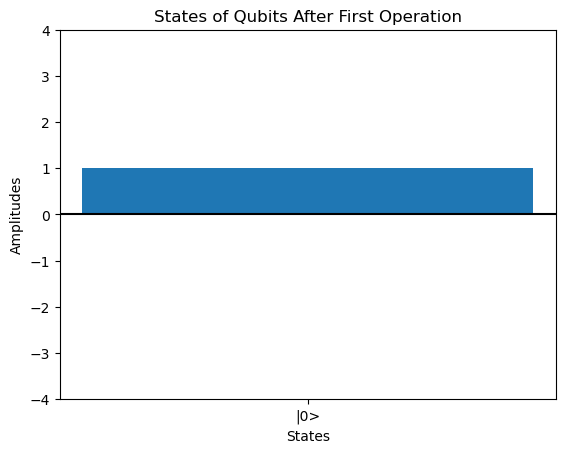

In [31]:
import matplotlib.pyplot as plt

figure_FirstDumpMachine = plt.figure()
plt.axhline(y=0, color='k', linestyle='-')
plt.bar(firstStates, firstAmplitudes, width = 0.3)
plt.ylim([-4, 4])
plt.xlabel('States')
plt.ylabel('Amplitudes')
plt.title('States of Qubits After First Operation')
plt.show()

In [32]:
secondAmplitudes = []
secondStates = []
DumpMachine2 = diagnostics[1]['amplitudes']

secondValueList = list(DumpMachine2.values())

def StateConversion(num):
    result = bin(num).replace("0b", "")
    stateString = "|" + result + ">"
    secondStates.append(stateString)   
    
for element in range(0,len(secondValueList)):
    output = list(secondValueList[element].values())
    if abs(round(output[2],3)) != 0:
        secondAmplitudes.append(round(output[2],3))
        secondStates.append(element)

print(secondAmplitudes)
print(secondStates)

[0.081, 0.081, 0.081, 0.081, 0.081, 0.081, 0.081, 0.081, 0.081, 0.081, 0.081, 0.081, 0.081, 0.081, 0.081, 0.081, 0.081, 0.081, 0.081, 0.081, 0.081, 0.081, 0.081, 0.081, 0.081, 0.081, 0.081, 0.081, 0.081, 0.081, 0.081, 0.081, 0.081, 0.081, 0.081, 0.081, 0.081, 0.081, 0.081, 0.081, 0.081, 0.081, 0.081, 0.081, 0.081, 0.081, 0.081, 0.081, 0.081, 0.081, 0.081, 0.081, 0.081, 0.081, 0.081, 0.081, 0.081, 0.081, 0.081, 0.081, 0.081, 0.081, 0.081, 0.769]
[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100, 102, 104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 127]


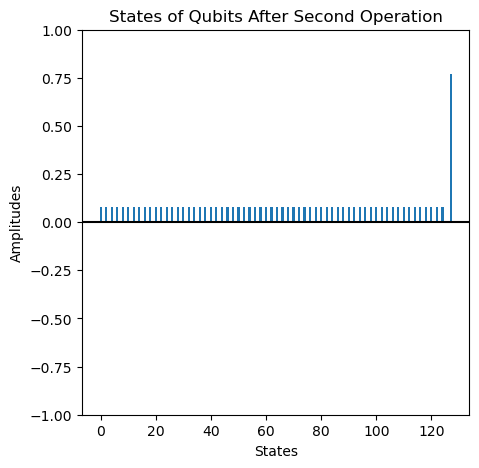

In [36]:
figure_SecondDumpMachine = plt.figure(figsize=(5, 5))
plt.axhline(y=0, color='k', linestyle='-')
plt.bar(secondStates, secondAmplitudes)
plt.ylim([-1, 1])
plt.xlabel('States')
plt.ylabel('Amplitudes')
plt.title('States of Qubits After Second Operation')
plt.show()

In [34]:
thirdAmplitudes = []
thirdStates = []
DumpMachine3 = diagnostics[2]['amplitudes']

thirdValueList = list(DumpMachine3.values())

def StateConversion(num):
    result = bin(num).replace("0b", "")
    stateString = "|" + result + ">"
    thirdStates.append(stateString)   
    
for element in range(0,len(thirdValueList)):
    output = list(thirdValueList[element].values())
    if abs(round(output[2],3)) != 0:
        thirdAmplitudes.append(round(output[2],3))
        StateConversion(element)

print(thirdAmplitudes)
print(thirdStates)

[1.0]
['|1111111>']


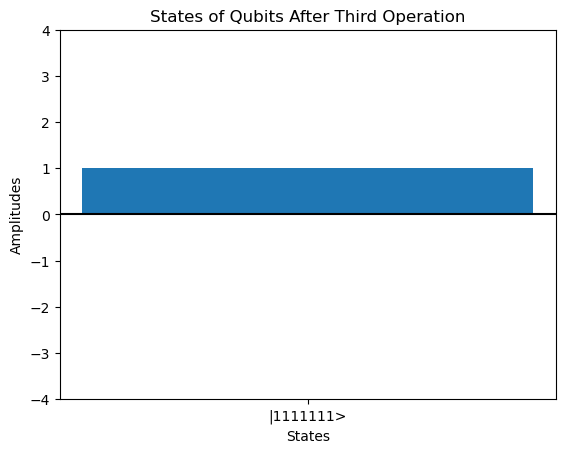

In [35]:
figure_ThirdDumpMachine = plt.figure()
plt.axhline(y=0, color='k', linestyle='-')
plt.bar(thirdStates, thirdAmplitudes, width = 0.3)
plt.ylim([-4, 4])
plt.xlabel('States')
plt.ylabel('Amplitudes')
plt.title('States of Qubits After Third Operation')
plt.show()